# 통계적으로 추론하기

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://nbviewer.jupyter.org/github/rickiepark/hg-da/blob/main/06-1.ipynb"><img src="https://jupyter.org/assets/share.png" width="61" />주피터 노트북 뷰어로 보기</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-da/blob/main/06-1.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩(Colab)에서 실행하기</a>
  </td>
</table>

## 시작하기 전에

In [1]:
import gdown

gdown.download('https://bit.ly/nsbook7', 'ns_book7.csv', quiet=False)

Downloading...
From: https://bit.ly/nsbook7
To: /content/ns_book7.csv
100%|██████████| 53.8M/53.8M [00:00<00:00, 137MB/s]


'ns_book7.csv'

In [2]:
import pandas as pd

ns_book7 = pd.read_csv('ns_book7.csv', low_memory=False)
ns_book7.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


## 표준 점수

In [3]:
import numpy as np

x = [0, 3, 5, 7, 10]

s = np.std(x)
m = np.mean(x)
z = (7 - m) / s
print(z)

0.5872202195147035


In [4]:
from scipy import stats

stats.zscore(x)

array([-1.46805055, -0.58722022,  0.        ,  0.58722022,  1.46805055])

In [5]:
stats.norm.cdf(0)

0.5

In [6]:
stats.norm.cdf(1.0) - stats.norm.cdf(-1.0)

0.6826894921370859

In [7]:
stats.norm.cdf(2.0) - stats.norm.cdf(-2.0)

0.9544997361036416

In [8]:
stats.norm.ppf(0.9)

1.2815515655446004

## 중심 극한 정리

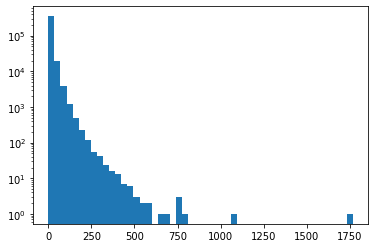

In [9]:
import matplotlib.pyplot as plt

plt.hist(ns_book7['대출건수'], bins=50)
plt.yscale('log')
plt.show()

In [10]:
np.random.seed(42)
sample_means = []
for _ in range(1000):
    m = ns_book7['대출건수'].sample(30).mean()
    sample_means.append(m)

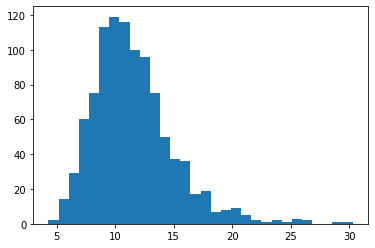

In [11]:
plt.hist(sample_means, bins=30)
plt.show()

In [12]:
np.mean(sample_means)

11.539900000000001

In [13]:
ns_book7['대출건수'].mean()

11.593438968070707

In [14]:
np.random.seed(42)
sample_means = []
for _ in range(1000):
    m = ns_book7['대출건수'].sample(20).mean()
    sample_means.append(m)
np.mean(sample_means)

11.39945

In [15]:
np.random.seed(42)
sample_means = []
for _ in range(1000):
    m = ns_book7['대출건수'].sample(40).mean()
    sample_means.append(m)
np.mean(sample_means)

11.5613

In [16]:
np.std(sample_means)

3.0355987564235165

In [17]:
np.std(ns_book7['대출건수']) / np.sqrt(40)

3.048338251806833

## 신뢰 구간

In [18]:
python_books_index = ns_book7['주제분류번호'].str.startswith('00') & \
                     ns_book7['도서명'].str.contains('파이썬')
python_books = ns_book7[python_books_index]
python_books.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
1040,1060,실전 알고리즘 트레이딩 배우기 (파이썬으로 시작하는 알고리즘 트레이딩의 기초와 실전...,세바스티앙 도나디오.수라브 고쉬 지음|이기홍,에이콘출판,2021,9791161754901,NaN,NaN,NaN,004.73,1,1,2021-03-09
1162,1185,파이썬으로 경험하는 빅데이터 분석과 머신러닝,"이영호,이수현 지음",생능출판사,2021,9788970504803,NaN,9,NaN,005.135,1,1,2021-03-02
1447,1504,금융 파이썬 쿡북 (금융 데이터 처리와 기술 분석부터 딥러닝 적용까지),에릭 르윈슨,에이콘출판,2021,9791161750507,NaN,NaN,NaN,005.133,1,2,2021-02-22
1563,1630,프로그래머를 위한 파이썬 (실전 프로젝트로 배우는 소프트웨어 개발의 원리와 정석),데인 힐라드 지음|황반석,제이펍,2020,9791190665636,NaN,NaN,NaN,005.133,1,2,2021-02-16
1571,1640,"엑셀 × 파이썬 업무 자동화 - 매크로, VBA는 이제 낡았다!","카네히로 카즈미 (지은이), 서수환 (옮긴이)",인사이트,2020,9788966262847,NaN,NaN,NaN,005.53,1,2,2021-02-16


In [19]:
len(python_books)

251

In [20]:
python_mean = np.mean(python_books['대출건수'])
python_mean

14.749003984063744

In [21]:
python_std = np.std(python_books['대출건수'])
python_se = python_std / np.sqrt(len(python_books))
python_se

0.8041612072427442

In [22]:
stats.norm.ppf(0.975)

1.959963984540054

In [23]:
stats.norm.ppf(0.025)

-1.9599639845400545

In [24]:
print(python_mean-1.96*python_se, python_mean+1.96*python_se)

13.172848017867965 16.325159950259522


## 가설 검정

In [25]:
cplus_books_index = ns_book7['주제분류번호'].str.startswith('00') & \
                    ns_book7['도서명'].str.contains('C++', regex=False)
cplus_books = ns_book7[cplus_books_index]
cplus_books.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
101,103,C++를 사용한 언리얼 엔진 4 개발 2/e (100여 개의 레시피를 통해 배우는 ...,존 도란.윌리엄 셰리프.스테판 화이틀 지음|조경빈,에이콘,2020,9791161754659,NaN,NaN,NaN,005.11,1,1,2021-03-15
19754,20779,Game Programming in C++,산자이 마드하브,에이콘출판,2019,9791161753560,NaN,NaN,NaN,005.133,1,10,2019-11-26
20198,21289,C++ API OpenCV 프로그래밍 - 2nd Edition,김동근,가메출판사,2016,9788980782864,NaN,NaN,NaN,004.77,1,5,2019-11-05
21630,22950,Visual C++ 영상처리 프로그래밍 =Visual C++ image proces...,황선규 지음,길벗,2015,9791186978153,NaN,9,NaN,004.77,1,3,2019-10-22
22461,23859,Functional Programming in C++,"이반 추키츠 지음, 김점갑 옮김",에이콘출판,2019,9791161753416,NaN,NaN,NaN,005.133,1,4,2019-09-26


In [26]:
len(cplus_books)

89

In [27]:
cplus_mean = np.mean(cplus_books['대출건수'])
cplus_mean

11.595505617977528

In [28]:
cplus_se = np.std(cplus_books['대출건수'])/ np.sqrt(len(cplus_books))
cplus_se

0.9748405650607009

In [29]:
(python_mean - cplus_mean) / np.sqrt(python_se**2 + cplus_se**2)

2.495408195140708

In [30]:
stats.norm.cdf(2.61)

0.9954728888670327

In [31]:
p_value = (1-0.995)*2
p_value

0.010000000000000009

In [32]:
t, pvalue = stats.ttest_ind(python_books['대출건수'], cplus_books['대출건수'])
print(t, pvalue)

2.1390005694958574 0.03315179520224784


## 순열 검정

In [43]:
def statistic(x, y):
    return np.mean(x) - np.mean(y)

t, pvalue = stats.permutation_test((python_books['대출건수'], cplus_books['대출건수']), 
                                   statistic, random_state=42)
print(t, pvalue)

AttributeError: ignored

In [33]:
t, pvalue = stats.ttest_ind(python_books['대출건수'], cplus_books['대출건수'], 
                            permutations=1000, random_state=42)
print(t, pvalue)

2.1390005694958574 0.03


In [34]:
java_books = ns_book7[ns_book7['주제분류번호'].str.startswith('00') & ns_book7['도서명'].str.contains('자바')]
java_books.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
1030,1049,자바스크립트로 하는 자료 구조와 알고리즘 (핵심 자료 구조 및 알고리즘을 이해하고 ...,<b>배세민</b>,에이콘,2019,9791161753447,NaN,NaN,NaN,005.138,1,1,2021-03-09
1468,1528,자바 기초만 알면 할 수 있는 JSP 웹 프로그래밍 (자바 기초만 알면 할 수 있는),이성욱|장종준,21세기사,2020,9788984688513,NaN,NaN,NaN,005.138,1,1,2021-02-22
2521,2627,프레임워크 없는 프론트엔드 개발 (자바스크립트 프레임워크 뜯어보기),프란세스코 스트라츨로,에이콘출판,2021,9791161754895,NaN,NaN,NaN,005.138,1,1,2021-02-08
4989,5330,(ES6로 기초부터 다시 배우는) 자바스크립트 파워북,어포스트 지음,어포스트,2020,9791197122811,NaN,9,NaN,005.133,1,4,2020-10-19
4997,5338,모던 자바스크립트 deep dive :자바스크립트의 기본 개념과 동작 원리,이웅모 지음,위키북스,2020,9791158392239,NaN,9,NaN,005.138,1,4,2020-10-19


In [35]:
len(java_books), np.mean(java_books['대출건수'])

(220, 15.345454545454546)

In [38]:
t, pvalue = stats.ttest_ind(python_books['대출건수'], java_books['대출건수'],
                            permutations=1000, random_state=42)
print(t, pvalue)

-0.5411776675304295 0.582
